In [1]:
import numpy as np
from rasterio.merge import merge
import rasterio
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
file1 = 'data/Allamakee.tif'
file2 = 'data/Crawford.tif'

## Merge the two rasters
* for a description see: https://mapbox.s3.amazonaws.com/playground/perrygeo/rasterio-docs/rasterio.merge.html

In [3]:
with rasterio.open(file1) as src:
    img1 = src.read(1)
    with rasterio.open(file2) as src2:
        img2 = src2.read(1)
    
        out_image, out_trans = merge([src, src2], nodata=0)
        
        # write the merged dataset out to a new raster file
        # open the merged GeoTiff in a GIS to verify that it is correct!
        out_meta = src.meta.copy()
        out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_trans})
        with rasterio.open("data/merged.tif", "w", **out_meta) as dest:
            dest.write(out_image)

#### Note that there is no sign of the 0.01 degrees of overlap
* the [reverse painter’s algorithm](https://en.wikipedia.org/wiki/Painter%27s_algorithm) is used to merge the files in their listed order

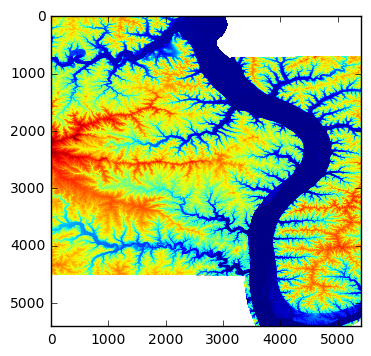

In [4]:
out_image[out_image == 0] = np.nan
plt.imshow(out_image[0, :, :])